### Cataract Image Classifier

In [1]:
# https://youtu.be/jztwpsIzEGc

#### Install Dependencies

In [1]:
pip install tensorflow opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

2023-03-31 09:10:05.237023: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-31 09:10:06.808810: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-31 09:10:06.888950: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ros/noetic/lib
2023-03-31 09:10:06.888980: I tensorflow/compiler/xla/stream_ex

In [3]:
img = cv2.imread(os.path.join('dataset', 'images', '1.jpg'))

In [4]:
img

array([[[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       [[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       [[17,  5,  3],
        [16,  4,  2],
        [16,  4,  2],
        ...,
        [17,  6,  2],
        [17,  6,  2],
        [17,  6,  2]],

       ...,

       [[12,  3,  0],
        [13,  4,  0],
        [14,  5,  1],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]],

       [[11,  2,  0],
        [13,  4,  0],
        [15,  6,  2],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]],

       [[11,  2,  0],
        [13,  4,  0],
        [15,  6,  2],
        ...,
        [10,  5,  2],
        [11,  6,  3],
        [11,  6,  3]]], dtype=uint8)

In [5]:
img.shape

(1728, 2592, 3)

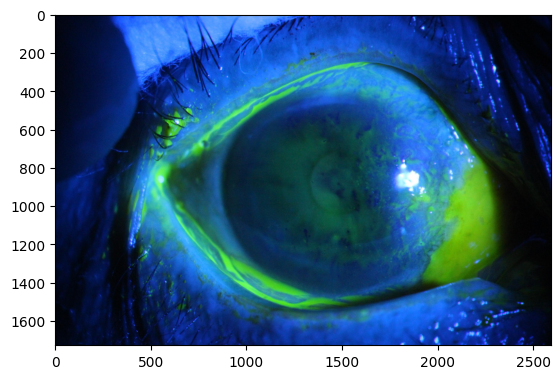

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 712 files belonging to 1 classes.


2023-03-31 09:10:15.074432: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mine/Documents/vs-code/py-python/projects/cataract-detection-rp/venv/lib/python3.8/site-packages/cv2/../../lib64:/opt/ros/noetic/lib
2023-03-31 09:10:15.074617: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-31 09:10:15.074645: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ELEVEN): /proc/driver/nvidia/version does not exist
2023-03-31 09:10:15.076089: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_V

In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()
batch

(array([[[[0.00000000e+00, 2.00000000e+00, 1.00000000e+00],
          [0.00000000e+00, 1.87500000e+00, 2.07812500e+00],
          [0.00000000e+00, 3.00000000e+00, 6.00000000e+00],
          ...,
          [2.00000000e+00, 2.00000000e+00, 4.00000000e+00],
          [6.87500000e-01, 2.31250000e+00, 4.00000000e+00],
          [0.00000000e+00, 2.00000000e+00, 3.00000000e+00]],
 
         [[0.00000000e+00, 2.37500000e+00, 6.62500000e+00],
          [0.00000000e+00, 2.37500000e+00, 6.62500000e+00],
          [0.00000000e+00, 2.00000000e+00, 5.00000000e+00],
          ...,
          [1.18750000e+00, 1.18750000e+00, 3.18750000e+00],
          [0.00000000e+00, 1.31250000e+00, 3.00000000e+00],
          [0.00000000e+00, 3.00000000e+00, 4.00000000e+00]],
 
         [[0.00000000e+00, 3.62500000e+00, 6.62500000e+00],
          [0.00000000e+00, 3.00000000e+00, 6.00000000e+00],
          [0.00000000e+00, 2.00000000e+00, 7.00000000e+00],
          ...,
          [2.00000000e+00, 1.00000000e+00, 6.0000

In [10]:
len(batch)

2

In [11]:
batch[0]

array([[[[0.00000000e+00, 2.00000000e+00, 1.00000000e+00],
         [0.00000000e+00, 1.87500000e+00, 2.07812500e+00],
         [0.00000000e+00, 3.00000000e+00, 6.00000000e+00],
         ...,
         [2.00000000e+00, 2.00000000e+00, 4.00000000e+00],
         [6.87500000e-01, 2.31250000e+00, 4.00000000e+00],
         [0.00000000e+00, 2.00000000e+00, 3.00000000e+00]],

        [[0.00000000e+00, 2.37500000e+00, 6.62500000e+00],
         [0.00000000e+00, 2.37500000e+00, 6.62500000e+00],
         [0.00000000e+00, 2.00000000e+00, 5.00000000e+00],
         ...,
         [1.18750000e+00, 1.18750000e+00, 3.18750000e+00],
         [0.00000000e+00, 1.31250000e+00, 3.00000000e+00],
         [0.00000000e+00, 3.00000000e+00, 4.00000000e+00]],

        [[0.00000000e+00, 3.62500000e+00, 6.62500000e+00],
         [0.00000000e+00, 3.00000000e+00, 6.00000000e+00],
         [0.00000000e+00, 2.00000000e+00, 7.00000000e+00],
         ...,
         [2.00000000e+00, 1.00000000e+00, 6.00000000e+00],
         [

In [12]:
batch[0].shape

(32, 256, 256, 3)

In [13]:
batch[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

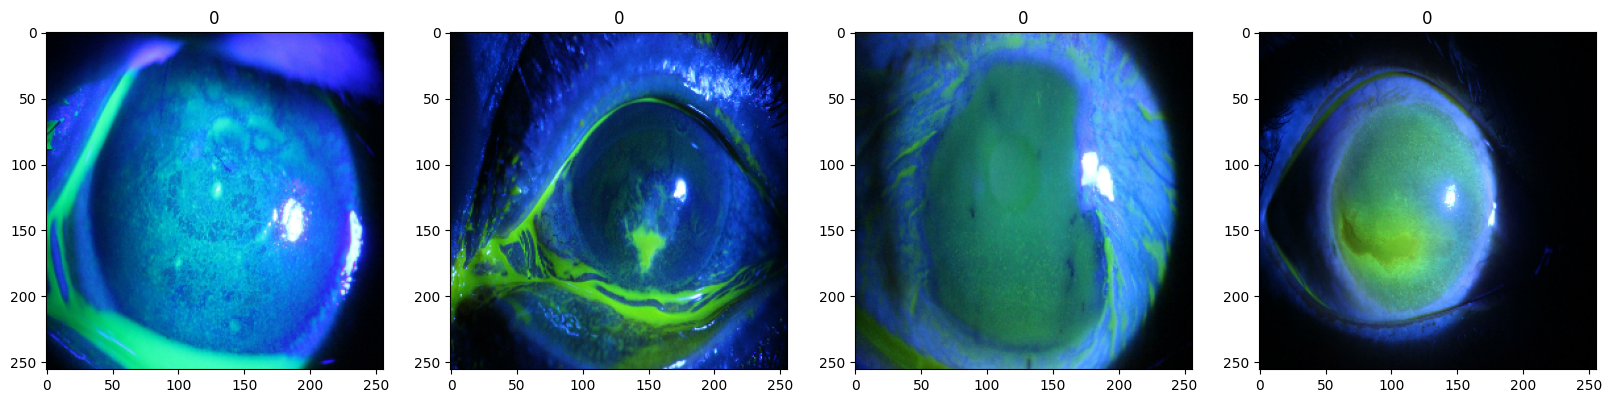

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].title.set_text(batch[1][idx])

In [15]:
scaled = batch[0] / 255.0

In [16]:
scaled.min()

0.0

In [17]:
scaled.max()

1.0

#### Pre Processing Data

Start here >

In [18]:
data = tf.keras.utils.image_dataset_from_directory('dataset', shuffle=False)

Found 712 files belonging to 1 classes.


In [19]:
data = data.shuffle(1000, seed=100, reshuffle_each_iteration=False)

In [20]:
scaled_data = data.map(lambda x, y: (x / 255.0, y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [21]:
scaled_iterator = scaled_data.as_numpy_iterator().next()
scaled_iterator

(array([[[[0.03115809, 0.05076593, 0.02723652],
          [0.05523897, 0.08268995, 0.01994485],
          [0.09705883, 0.14010416, 0.01715686],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.0385723 , 0.06210171, 0.02288603],
          [0.07328431, 0.10958946, 0.02052696],
          [0.09895834, 0.18308823, 0.        ],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         [[0.06446078, 0.07622549, 0.03651961],
          [0.0875    , 0.14212623, 0.00759804],
          [0.13158701, 0.24650735, 0.        ],
          ...,
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157],
          [0.00392157, 0.00392157, 0.00392157]],
 
         ...,
 
         [[0.00695466, 0.0479473 , 0.03333334],
          [0.00931

In [22]:
scaled_iterator[0].min()

0.0

In [23]:
scaled_iterator[0].max()

1.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


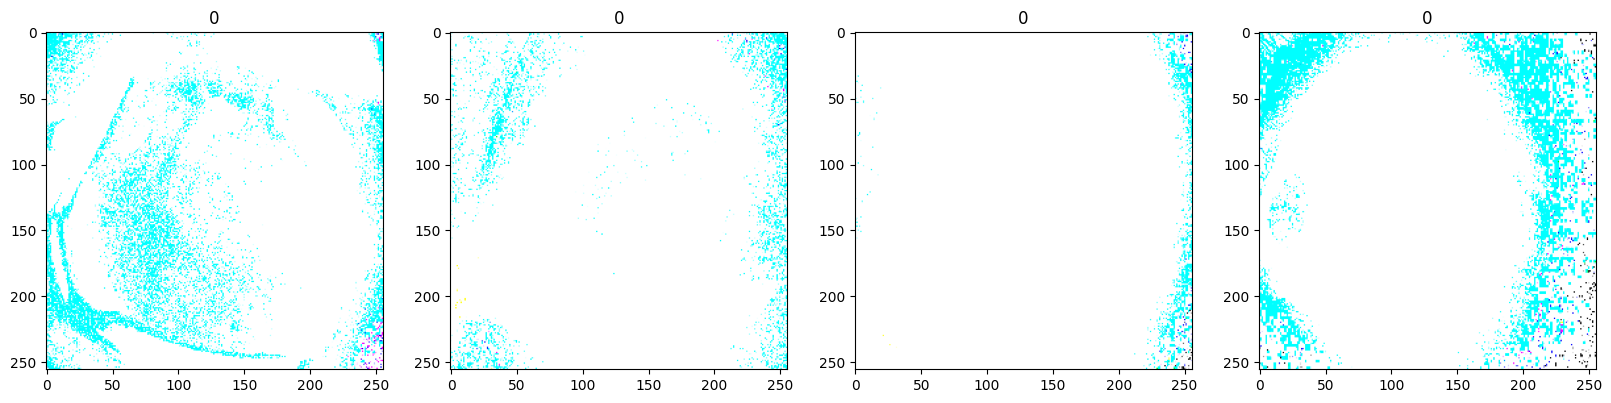

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 10))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])


In [25]:
# length of data
len(data) 

# 23 * 32 = 736

23

#### Split Data

In [26]:
train_size = int(0.7 * len(data))       # 16 * 32 = 512
val_size = int(0.2 * len(data))         # 4 * 32 = 128
test_size = int(0.1 * len(data)) + 1    # 3 * 32 = 96

In [27]:
train_size, val_size, test_size

(16, 4, 3)

In [28]:
train_size + val_size + test_size

23

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [30]:
len(train), len(val), len(test)

(16, 4, 3)

#### Deep Learning Model

##### Building Model

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

##### Training Model

In [36]:
logdir = 'logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [38]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
16/16 [==============================] - 16s 664ms/step - loss: 0.4166 - accuracy: 0.9629 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
16/16 [==============================] - 14s 598ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
16/16 [==============================] - 14s 615ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
16/16 [==============================] - 14s 617ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
16/16 [==============================] - 13s 593ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
16/16 [==============================] - 14s 617ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 14s 618ms/step - loss: 0.0000e+00 - accuracy: 

In [39]:
hist.history

{'loss': [0.4166373610496521,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'accuracy': [0.962890625,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0]}

#### Plotting Performance

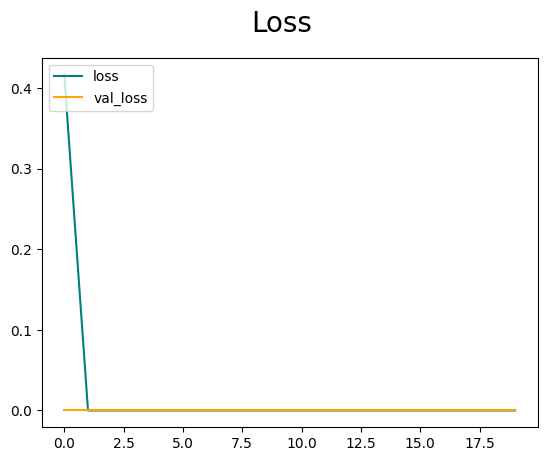

In [40]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

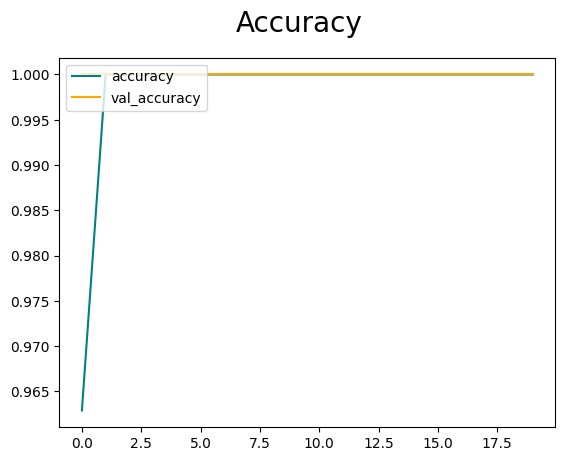

In [41]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

#### Evaluating Performance

##### Evaluating Model

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 105ms/step


In [45]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.0, Recall: 0.0, Accuracy: 1.0


##### Testing Model

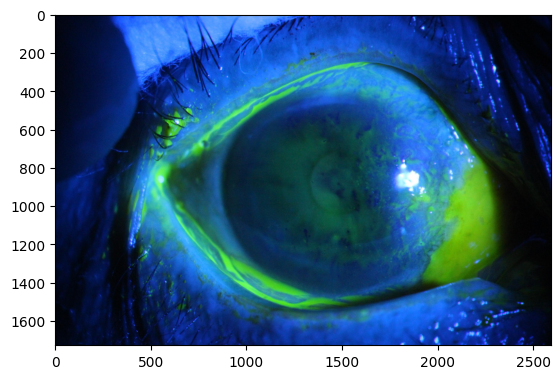

In [46]:
img = cv2.imread(os.path.join('dataset', 'images', '1.jpg'))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

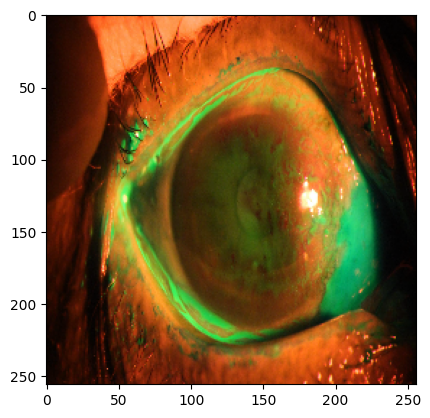

In [47]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype('int'))
plt.show()

In [48]:
resize.shape

TensorShape([256, 256, 3])

In [49]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 372ms/step


In [51]:
yhat

array([[3.8940272e-22]], dtype=float32)

#### Saving Model

In [52]:
from tensorflow.keras.models import load_model

In [53]:
model.save(os.path.join('models', 'model_one.h5'))